In [61]:
import os
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd
import numpy as np
import shutil
import matplotlib.patches as patches
from PIL import Image
import random

In [14]:
os.getcwd()

'c:\\Users\\Ayo Agbaje\\Documents\\Code\\Python\\GIGS\\PYTHON_docs\\py_files\\license_plates_detection'

In [15]:
# os.makedirs('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/images/train')
# os.makedirs('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/images/val')
# os.makedirs('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/labels/train')
# os.makedirs('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/labels/val')

image shape (477, 850, 3)


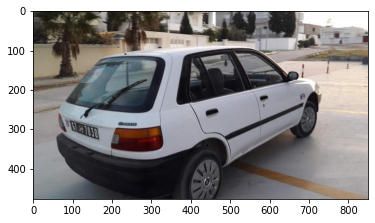

In [16]:
# load any image and plot
imgg = image.imread('images/1.jpg')
plt.imshow(imgg)
print(f"image shape {imgg.shape}")

In [39]:
df_ = pd.read_csv('license_plates_detection_train.csv')
df_.head()

,img_id,ymin,xmin,ymax,xmax
0,1.jpg,276,94,326,169
1,10.jpg,311,395,344,444
2,100.jpg,406,263,450,434
3,101.jpg,283,363,315,494
4,102.jpg,139,42,280,222


In [40]:
df_['xcentre'] = (df_['xmax'] + df_['xmin']) / 2
df_['ycentre'] = (df_['ymax'] + df_['ymin']) / 2
df_['width'] = df_['xmax'] - df_['xmin']
df_['height'] = df_['ymax'] - df_['ymin']

In [41]:
df_.head()

,img_id,ymin,xmin,ymax,xmax,xcentre,ycentre,width,height
0,1.jpg,276,94,326,169,131.5,301.0,75,50
1,10.jpg,311,395,344,444,419.5,327.5,49,33
2,100.jpg,406,263,450,434,348.5,428.0,171,44
3,101.jpg,283,363,315,494,428.5,299.0,131,32
4,102.jpg,139,42,280,222,132.0,209.5,180,141


In [42]:
cols = ['img_id', 'xcentre', 'ycentre', 'width', 'height']
df_ = df_[cols]
df_.head()

,img_id,xcentre,ycentre,width,height
0,1.jpg,131.5,301.0,75,50
1,10.jpg,419.5,327.5,49,33
2,100.jpg,348.5,428.0,171,44
3,101.jpg,428.5,299.0,131,32
4,102.jpg,132.0,209.5,180,141


In [45]:
# for i in range(len(df_)):
#     # print(df_.loc[[i], 'img_id':'height'])
#     df = df_.loc[[i], 'img_id':'height']
#     img_ = image.imread(f"images/{df['img_id'].values[0]}")
#     h, w, _ = img_.shape

#     xcentre = df['xcentre'].values[0] / w
#     ycentre = df['ycentre'].values[0] / h
#     width = df['width'].values[0] / w
#     height = df['height'].values[0] / h

#     file_ = open(f"labels/{df['img_id'].values[0].split('.')[0] + '.txt'}", 'w')
#     file_.write(f"""0 {xcentre} {ycentre} {width} {height}""")
#     file_.close()


In [50]:
# move images and txt files into train and validation folders
img_path = 'C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/images'
images_ = []

for folder, doc, file in os.walk(img_path):
    for image in file:
        if image.endswith('.jpg'):
            images_.append(image)

images_ = sorted(images_)

In [54]:
lbl_path = 'C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/labels'
text_files = []

for folder, doc, file in os.walk(lbl_path):
    for txt in file:
        if txt.endswith('.txt'):
            text_files.append(txt)

txt_files = sorted(text_files)

In [56]:
train_image_path = 'C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/images/train'
val_image_path = 'C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/images/val'
train_label_path = 'C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/labels/train'
val_label_path = 'C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/PYTHON_docs/py_files/license_plates_detection/labels/val'

In [57]:
# # Move 750 images to the train folder
# os.chdir(img_path)
# for i in range(750):
#     img = images_[i]
#     shutil.move(img, train_image_path)

# # Move 750 text files to the train folder
# os.chdir(lbl_path)
# for i in range(750):
#     txt = txt_files[i]
#     shutil.move(txt, train_label_path)

# # Move 150 images to the validation folder
# os.chdir(img_path)
# for i in range(150):
#     img = images_[i + 750]
#     shutil.move(img, val_image_path)

# # Move 750 text files to the train folder
# os.chdir(lbl_path)
# for i in range(150):
#     txt = txt_files[i + 750]
#     shutil.move(txt, val_label_path)

In [63]:
def plot_images_with_bounding_boxes(image_folder, annotation_folder, class_names, num_images=9):
    # Get the list of image files
    image_files = os.listdir(image_folder)
    
    # Randomly select num_images files
    selected_files = random.sample(image_files, min(num_images, len(image_files)))
    
    # Create a new figure for plotting
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    # fig.tight_layout()
    
    # Initialize the grid counters
    rows, cols = 3, 3
    grid_counter = 0
    
    for image_file, ax in zip(selected_files, axes.flat):
        # Load the image
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path)
        
        # Load the corresponding annotation file
        annotation_file = os.path.splitext(image_file)[0] + '.txt'
        annotation_path = os.path.join(annotation_folder, annotation_file)
        
        # Check if the annotation file exists
        if os.path.exists(annotation_path):
            # Read the bounding box annotations
            with open(annotation_path, 'r') as f:
                annotations = f.readlines()
            
            # Plot the image
            ax.imshow(image)
            
            # Plot bounding boxes on the image
            for annotation in annotations:
                class_id, x, y, width, height = map(float, annotation.strip().split())
                x1 = (x - width / 2) * image.width
                y1 = (y - height / 2) * image.height
                box_width = width * image.width
                box_height = height * image.height
                
                # Create a rectangle patch for the bounding box
                rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(rect)
                
                # Add the class label near the bounding box
                class_name = class_names[int(class_id)]
                ax.text(x1, y1 - 10, class_name, fontsize=8, color='g', weight='bold', va='center', ha='center',
                        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
        
        # Remove ticks and labels
        ax.axis('off')
        
        # Increment the grid counter
        grid_counter += 1
        
        # Break if the grid limit is reached
        if grid_counter >= rows * cols:
            break
    
    # Show the plot
    plt.show()

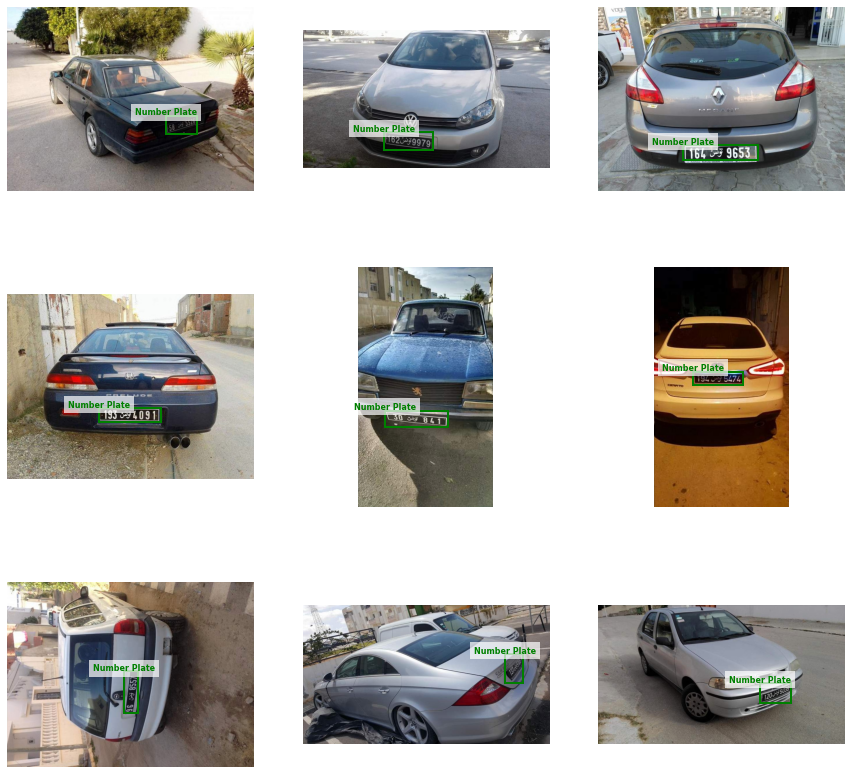

In [64]:
plot_images_with_bounding_boxes(image_folder=train_image_path, annotation_folder = train_label_path, class_names = ['Number Plate'])